1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.]) 

Global minima in [0. 0.]
In [0. 0.] the function assumes the value  0.0


'\npylab.figure()\nparam = (x,y)\n\npylab.plot(x,y, f(param))\n\nresult = optimize.minimize(f,initial_guess)\nprint(result,"\n")\n\nfitted_params = result.x\nprint("Global minima in",fitted_params)\nprint("In",fitted_params,"the function assumes the value ",f(result.x))\nplt.plot(fitted_params[0], fitted_params[1], marker="o")\n\n'

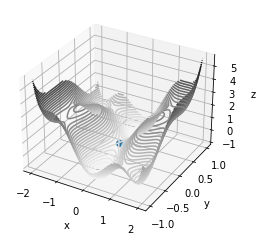

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import optimize
from scipy.optimize import fmin
import scipy

def f(param):
    x,y = param
    v = (4-(2.1)*((x)**2)+((x**4)/3))*(x**2)+(x*y)+((4*(y**2)-4)*y**2)
    return v

initial_guess = np.array([0,0])
x = np.linspace(-2, 2, 100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)
z = f([X,Y])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z, 50, cmap='binary')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

result = optimize.minimize(f,initial_guess)
print(result,"\n")
fitted_params = result.x

plt.plot(fitted_params[0], fitted_params[1],f(result.x), marker="o")

print("Global minima in",fitted_params)
print("In",fitted_params,"the function assumes the value ",f(result.x))

'''
pylab.figure()
param = (x,y)

pylab.plot(x,y, f(param))

result = optimize.minimize(f,initial_guess)
print(result,"\n")

fitted_params = result.x
print("Global minima in",fitted_params)
print("In",fitted_params,"the function assumes the value ",f(result.x))
plt.plot(fitted_params[0], fitted_params[1], marker="o")

'''

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

TypeError: array([-62., -59., -56., -46., -32., -18.,  -9., -13., -25., -46., -52.,
       -58.]) is not a callable object

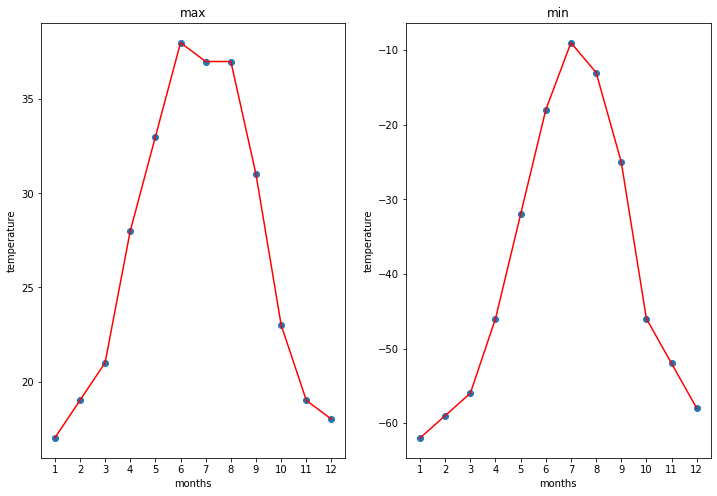

In [113]:
from scipy.interpolate import interp1d


max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8)) # create the figure and the axes

major = np.arange(0, 13, 1)

#max
ax0.set_title('max')
ax0.set_xlabel('months')
ax0.set_ylabel('temperature')
ax0.set_xticks(major)
ax0.scatter(months,max)

interp = interp1d(months, max)
results = interp(months)
ax0.plot(months, results, color='r')

#min
ax1.set_title('min')
ax1.set_xlabel('months')
ax1.set_ylabel('temperature')
ax1.set_xticks(major)
ax1.scatter(months,min)

interp = interp1d(months, min)
results = interp(months)
ax1.plot(months, results, color='r')




3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.